In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("../../Clean-Energy-Outlook/Data/data of states/CA.csv")

OP_array = df["Inflation Adjusted Price"].values
OP = df["Inflation Adjusted Price"].values.reshape(-1,1)
print(OP_array)

[  23.72         22.96         22.69         22.9          23.3          23.
   23.01         22.53         21.99         21.81         21.04         21.42
   20.74         25.56         45.6          54.61         55.46         57.2
   55.24         82.51        109.51         94.83         79.5          70.34
   66.67         60.27         31.72         37.62         30.33         35.6
   42.62         35.73         33.04         27.94         25.44         26.48
   31.4          27.98         17.6          23.89         38.29         31.3
   30.52         36.26         47.98         61.65         69.64         74.44
  102.           59.93         78.65         93.21         90.72         94.25
   87.05         42.53         45.34334282   47.8655742    49.56425183
   51.26292947   52.96160711]


In [4]:
result = []
for i in range(len(OP_array) - 2):
    result.append([OP_array[i], OP_array[i+1], OP_array[i+2]])
OP_newx = np.array(result)
OP_newy = OP_array[3:].reshape(-1,1)

OP_newx_train = OP_newx[:-6]
OP_newy_train = OP_newy[:-5]
OP_newx_test = OP_newx[-6:]
OP_newy_test = OP_newy[-5:]

print(OP_newx_test)
print(OP_newy_test)

[[ 94.25        87.05        42.53      ]
 [ 87.05        42.53        45.34334282]
 [ 42.53        45.34334282  47.8655742 ]
 [ 45.34334282  47.8655742   49.56425183]
 [ 47.8655742   49.56425183  51.26292947]
 [ 49.56425183  51.26292947  52.96160711]]
[[ 45.34334282]
 [ 47.8655742 ]
 [ 49.56425183]
 [ 51.26292947]
 [ 52.96160711]]


In [5]:
OP_17_y = y_lasso[-1]
print(OP_17_y)
OP_18_x = np.append(OP_array[-2:], OP_17_y)
print(OP_18_x)
OP_18_y = regr.predict(OP_18_x)
print(OP_18_y)

OP_18 = OP_18_y.item(0)
OP_19_x = np.append(OP_18_x[-2:], OP_18)
print(OP_19_x)
OP_19_y = regr.predict(OP_19_x)
print(OP_19_y)
OP_19 = OP_19_y.item(0)

y_lasso_all = np.append(y_lasso, [OP_18, OP_19])

plt.figure()
plt.scatter(year_all[3:].reshape(-1,1), y_lasso_all)
plt.show()

NameError: name 'y_lasso' is not defined

52.5495439769
[ 51.26292947  52.96160711  52.54954398]
[ 52.05495276]
[ 52.96160711  52.54954398  52.05495276]
[ 51.60847377]


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


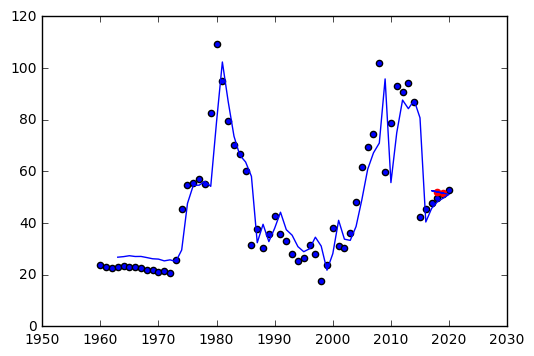

In [6]:
#Lasso regression
regr = linear_model.Lasso()
regr.fit(OP_newx_train, OP_newy_train)

OP_lassoy_train = regr.predict(OP_newx_train)
OP_lassoy_test = regr.predict(OP_newx_test)

year_all = np.append(df.Year.values, [2017, 2018, 2019])
y_lasso = np.append(OP_lassoy_train, OP_lassoy_test)

OP_17_y = y_lasso[-1]
print(OP_17_y)
OP_18_x = np.append(OP_array[-2:], OP_17_y)
print(OP_18_x)
OP_18_y = regr.predict(OP_18_x)
print(OP_18_y)

OP_18 = OP_18_y.item(0)
OP_19_x = np.append(OP_18_x[-2:], OP_18)
print(OP_19_x)
OP_19_y = regr.predict(OP_19_x)
print(OP_19_y)
OP_19 = OP_19_y.item(0)

y_lasso_all = np.append(y_lasso, [OP_18, OP_19])

plt.figure()
plt.scatter(df.Year.reshape(-1,1), df["Inflation Adjusted Price"])
#plt.plot(df.Year[2:-1].reshape(-1,1), y_lasso[:-1])
plt.scatter(year_all[-2:].reshape(-1,1), y_lasso_all[-2:], color='red')
plt.plot(year_all[3:].reshape(-1,1), y_lasso_all)
plt.show()

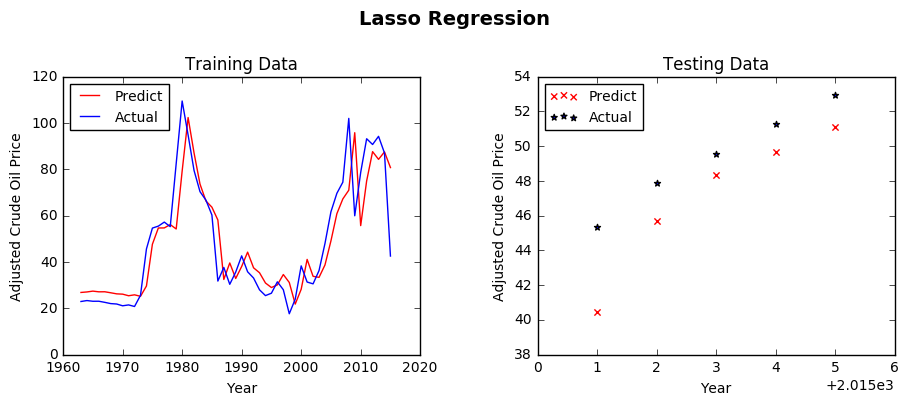

In [7]:
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Lasso Regression', fontsize=14, fontweight='bold')

#Plot for training data
fig.add_subplot(121)
plt.plot(df.Year[3:-5],regr.predict(OP_newx_train),label='Predict',c='r')
plt.plot(df.Year[3:-5],OP_newy_train,label='Actual')
plt.legend(loc=0,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('Adjusted Crude Oil Price')
         
#Plot for testing data
fig.add_subplot(122)
plt.scatter(df.Year[-5:],regr.predict(OP_newx_test)[:-1],marker='x',c='r',label='Predict')
plt.scatter(df.Year[-5:],OP_newy_test, marker='*',label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('Adjusted Crude Oil Price')

plt.tight_layout(pad=4, w_pad=4)
plt.show()

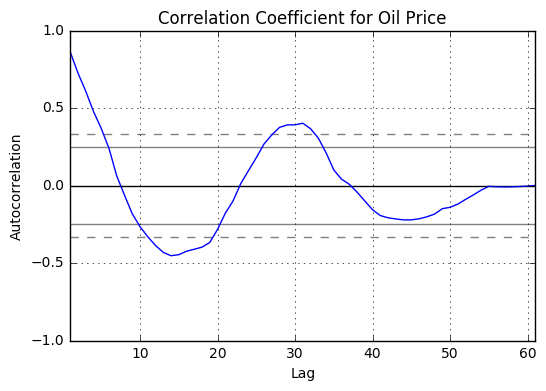

In [17]:
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(df["Inflation Adjusted Price"], lags=31)
autocorrelation_plot(df["Inflation Adjusted Price"])
#lag_plot(df["Inflation Adjusted Price"])
plt.title("Correlation Coefficient for Oil Price")
plt.show()

In [14]:
values = pd.DataFrame(df["Inflation Adjusted Price"])
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.867907
t+1  0.867907  1.000000
